(1) 데이터 가져오기
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [21]:
from sklearn.datasets import load_diabetes

# sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
dataset = load_diabetes()

X = dataset.data
y = dataset.target

import pandas as pd

# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.
df_X = pd.DataFrame(X, columns=dataset.feature_names)
df_y = pd.Series(y, name='target')

print(df_X.head())
print(df_y.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


(2) 모델에 입력할 데이터 X 준비하기
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [22]:
X = df_X.values

(3) 모델에 예측할 데이터 y 준비하기
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [23]:
y = df_y.values

(4) train 데이터와 test 데이터로 분리하기
- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(5) 모델 준비하기
- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [25]:
import numpy as np

# 가중치 W와 편향 b 초기화 (랜덤)
np.random.seed(0)  # 재현성을 위해 시드 설정
W = np.random.randn(X_train.shape[1])
b = np.random.randn()

# 모델 함수 구현
def model(X, W, b):
    predictions = np.dot(X, W) + b
    return predictions

(6) 손실함수 loss 정의하기
- 손실함수를 MSE 함수로 정의해주세요.

In [26]:
# 손실 함수 (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

(7) 기울기를 구하는 gradient 함수 구현하기
- 기울기를 계산하는 gradient 함수를 구현해주세요.


In [27]:
# 그레디언트 계산 함수
def gradients(X, y_true, y_pred):
    N = len(y_true)
    
    # 가중치 W에 대한 그레디언트
    dW = -2/N * np.dot(X.T, (y_true - y_pred))
    
    # 편향 b에 대한 그레디언트
    db = -2/N * np.sum(y_true - y_pred)
    
    return dW, db

(8) 하이퍼 파라미터인 학습률 설정하기
- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [37]:
# 학습률 설정
LEARNING_RATE = [0.001, 0.01, 0.1, 0.5, 0.7, 0.9, 1]
iterations = 1000

for lr in LEARNING_RATE:
    # 가중치 W와 편향 b 초기화 (랜덤)
    np.random.seed(0)
    W = np.random.randn(X_train.shape[1])
    b = np.random.randn()
    
    print(f"\nLearning Rate: {lr}")
    for i in range(iterations):
        predictions = model(X_train, W, b)
        dW, db = gradients(X_train, y_train, predictions)
        W -= lr * dW
        b -= lr * db
        
        # 주기적으로 손실 출력
        if i % 100 == 0:
            loss = mse_loss(y_train, predictions)
            print(f"Iteration {i}: MSE Loss = {loss}")
    
    # 최종 손실 출력
    final_loss = mse_loss(y_train, predictions)
    print(f"Final MSE Loss: {final_loss}")
    print(f"Weight: {W}, b: {b}")


Learning Rate: 0.001
Iteration 0: MSE Loss = 29651.462915853674
Iteration 100: MSE Loss = 21859.033766860946
Iteration 200: MSE Loss = 16635.138374053226
Iteration 300: MSE Loss = 13132.291920976562
Iteration 400: MSE Loss = 10782.638932562926
Iteration 500: MSE Loss = 9205.68899511291
Iteration 600: MSE Loss = 8146.495266488255
Iteration 700: MSE Loss = 7434.231114857508
Iteration 800: MSE Loss = 6954.434481247642
Iteration 900: MSE Loss = 6630.410272134969
Final MSE Loss: 6412.572774508446
Weight: [ 3.34451378  0.46408677  5.62172659  5.71358453  3.24556438  0.03636768
 -1.9727949   3.0252406   4.12835055  3.56438421], b: 132.96997521444985

Learning Rate: 0.01
Iteration 0: MSE Loss = 29651.462915853674
Iteration 100: MSE Loss = 6395.323036583554
Iteration 200: MSE Loss = 5911.859074354382
Iteration 300: MSE Loss = 5831.210785084373
Iteration 400: MSE Loss = 5759.881729791078
Iteration 500: MSE Loss = 5690.875686426532
Iteration 600: MSE Loss = 5623.996445863013
Iteration 700: MSE L

(9) 모델 학습하기
- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- Learning Rate: 0.9, 
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [38]:
def train_model(X, y):
    np.random.seed(0)
    W = np.random.randn(X.shape[1])
    b = np.random.randn()
    
    for i in range(5000):
        predictions = model(X, W, b)
        dW, db = gradients(X, y, predictions)
        W -= 0.9 * dW
        b -= 0.9 * db
        
        if i % 100 == 0:
            loss = mse_loss(y, predictions)
            print(f"Iteration {i}: MSE Loss = {loss}")
    
    final_loss = mse_loss(y, predictions)
    return W, b, final_loss

print("Original Data")
W, b, final_loss = train_model(X_train, y_train)
print(f"Final MSE Loss: {final_loss}")

Original Data
Iteration 0: MSE Loss = 29651.462915853674
Iteration 100: MSE Loss = 3511.4664344437747
Iteration 200: MSE Loss = 3133.2799575576055
Iteration 300: MSE Loss = 3002.288243989295
Iteration 400: MSE Loss = 2946.9773056685626
Iteration 500: MSE Loss = 2922.1706296859543
Iteration 600: MSE Loss = 2910.478426425421
Iteration 700: MSE Loss = 2904.666535579007
Iteration 800: MSE Loss = 2901.602779486159
Iteration 900: MSE Loss = 2899.8784786503415
Iteration 1000: MSE Loss = 2898.8347095675776
Iteration 1100: MSE Loss = 2898.150646382126
Iteration 1200: MSE Loss = 2897.6637597144854
Iteration 1300: MSE Loss = 2897.288548205081
Iteration 1400: MSE Loss = 2896.9784617731607
Iteration 1500: MSE Loss = 2896.707386563439
Iteration 1600: MSE Loss = 2896.460299694772
Iteration 1700: MSE Loss = 2896.2283790738365
Iteration 1800: MSE Loss = 2896.006357508345
Iteration 1900: MSE Loss = 2895.791048088683
Iteration 2000: MSE Loss = 2895.5805013645436
Iteration 2100: MSE Loss = 2895.3735135328

(10) test 데이터에 대한 성능 확인하기
- test 데이터에 대한 성능을 확인해주세요.


In [39]:
# 테스트 세트에 대한 예측 수행
predictions = model(X_test, W, b)

# 테스트 세트에 대한 손실 계산
test_loss = mse_loss(y_test, predictions)
print(f"Test MSE Loss: {test_loss}")


Test MSE Loss: 2885.782047821924


(11) 정답 데이터와 예측한 데이터 시각화하기
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

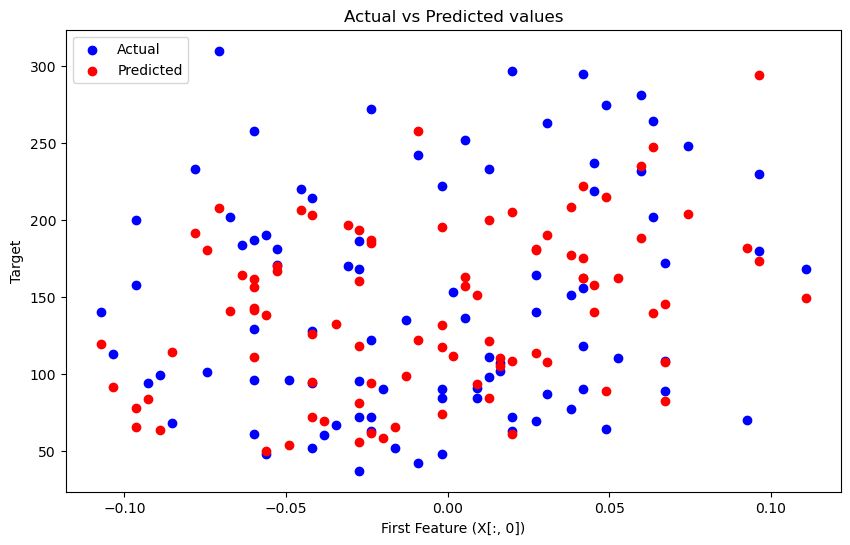

In [40]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], predictions, color='red', label='Predicted')
plt.xlabel('First Feature (X[:, 0])')
plt.ylabel('Target')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()